In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lambda_sum(w, lambd):
    return np.mean(lambd * w ** 2) / 2

class ActivationManager():
    def activate(self, z):
        pass

    def derivate(self, a):
        pass

    def cost(self, predictions, truth, w=None, lambd=None):
        pass


class SigmoidActivator(ActivationManager):
    def activate(self, z):
        return 1 / (1 + np.exp(-z))

    def derivate(self, a):
        return a * (1-a)

    def cost(self, predictions, truth, w=None, lambd=None):
        # if np.any(f == 1) or np.any(f == 0):
        # return "NAN"
        a = truth * np.log(predictions)
        b = (1 - truth) * np.log(1 - predictions)
        result = -np.mean(a+b)
        if w and lambd:
            result += lambda_sum(w, lambd)
        return result

class LinearActivator(ActivationManager):
    def activate(self, z):
        return z

    def cost(self, predictions, truth, w=None, lambd=None):
        result = np.mean((predictions - truth)**2) / 2
        if w and lambd:
            result += lambda_sum(w, lambd)
        return result

    def derivate(self, a):
        return 1


training_data = np.array([
    [0, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [1, 1, 1, 1]
])
x_train = training_data[:, 0:3]
y_train = training_data[:, 3:]

np.random.seed(1)
w1 = 2 * np.random.random((3, 5)) - 1
b1 = 2 * np.random.random(5) - 1
w2 = 2 * np.random.random((5, 1)) - 1
b2 = 2 * np.random.random(1) - 1
costs = []

activator1 = SigmoidActivator()
activator2 = SigmoidActivator()
z1 = np.dot(x_train, w1)
a1 = activator1.activate(z1)
z2 = np.dot(a1, w2)
a2 = activator2.activate(z2)
e2 = a2 - y_train

np.set_printoptions(precision=8, suppress=True)
print("W1:")
print(w1)
print("W2:")
print(w2)
print("ERROR:")
print(e2)
print("COST:")
print(activator2.cost(a2, y_train))

W1:
[[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822]
 [-0.81532281 -0.62747958 -0.30887855 -0.20646505  0.07763347]
 [-0.16161097  0.370439   -0.5910955   0.75623487 -0.94522481]]
W2:
[[ 0.60148914]
 [ 0.93652315]
 [-0.37315164]
 [ 0.38464523]
 [ 0.7527783 ]]
ERROR:
[[ 0.5       ]
 [ 0.51240323]
 [ 0.27214369]
 [ 0.28208346]
 [-0.49949228]
 [-0.48708937]
 [-0.72745384]
 [-0.71750508]]
COST:
0.748036902137295


In [2]:
ALPHA = 1
for i in range(10000):
    z1 = np.matmul(x_train, w1) + b1
    a1 = activator1.activate(z1)
    z2 = np.matmul(a1, w2) + b2
    a2 = activator2.activate(z2)
    m = len(a2)

    e2 = a2 - y_train
    g2 = e2 * activator2.derivate(a2)
    e1 = np.matmul(g2, w2.T)
    g1 = e1 * activator1.derivate(a1)

    gw2 = np.matmul(a1.T, g2) / m
    gw1 = np.matmul(x_train.T, g1) / m

    gb2 = np.mean(g2, axis=0)
    gb1 = np.mean(g1, axis=0)

    w2 -= gw2*ALPHA
    w1 -= gw1*ALPHA
    b2 -= gb2*ALPHA
    b1 -= gb1*ALPHA

    costs.append(activator2.cost(a2, y_train))

print("W1:")
print(w1)
print("W2:")
print(w2)
print("ERROR:")
print(e2)
print("COST:")
print(costs[-1])


W1:
[[ 0.45656269  2.18353446 -2.39950947 -0.06438507  0.25774101]
 [-0.72858088 -0.41959285 -0.45948847 -0.15955332  0.20250796]
 [-0.27802281  0.06725268 -0.35608944  0.69707826 -1.11663331]]
W2:
[[ 0.58431773]
 [ 2.45348581]
 [-2.33456845]
 [ 0.33057693]
 [ 1.10895403]]
ERROR:
[[ 0.00427244]
 [ 0.0035926 ]
 [ 0.00346372]
 [ 0.00291219]
 [-0.00237826]
 [-0.00282896]
 [-0.00293429]
 [-0.00348999]]
COST:
0.003239447551787589


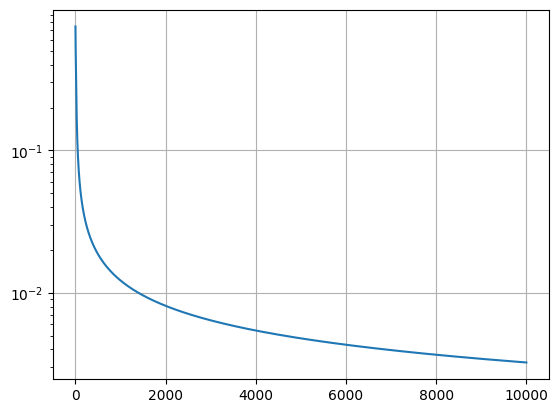

In [3]:
from matplotlib import pyplot as plt
plt.plot(costs)
plt.yscale('log')
plt.grid(True)
plt.show()